In [132]:
import numpy as np
import sympy as smp
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.integrate import cumulative_trapezoid
from tabulate import tabulate
import matplotlib
import piecewise_regression
import json

In [133]:
def mean(arr):
    return np.mean(arr)

def error(x):
    return x.std() / np.sqrt(x.size)

def weighted_error(x, err):
    
    x = np.asarray(x)
    err = np.asarray(err)
    
    average = np.sum(x/(err**2))/np.sum(1/err**2)
    
    average_error = 1/np.sqrt(np.sum(1/err**2))
    
    return average, average_error

def decimal(x):
    return x.replace(',', '.').encode()


In [187]:
matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

In [134]:
def I_f(r,m,eps):
    return r*m*(9.81/eps - r)

def sI_f(r,sr,m,sm,eps,seps):
    return np.sqrt(r**2*(9.81/eps - r)**2*sm**2 + (9.81*m*r/eps**2)**2*seps**2 + (9.81*m/eps - 2*m*r)**2*sr**2)

In [135]:
def load(name):
    t,pos = np.genfromtxt((decimal(x) for x in open(name)),unpack = True, skip_header=2)
    return t, pos

# UKOL 1

In [45]:
d = 5.7
r = d/2
r_m = 0.015

m_disk = 1427 ##pm1
m_prstenec = 1427 ##+-1
m_zavazi = 199.38 ##+-0.02

## r kladky = 5.06cm
r_m

0.015

## Disk

In [67]:
a1 = np.array([3.11,3.14,3.12,3.09,3.15,3.13,3.16,3.15,3.15,3.15])
eps = mean(a1)
seps = error(a1)
print('{} +- {}'.format(eps, seps))

3.135 +- 0.0066708320320631774


In [68]:
######## I namerena #######

I1 = I_f(r_m, m_zavazi, eps)
sI1 = sI_f(r_m, 0.001, m_zavazi, 0.2, eps, seps)
print('{} +- {}'.format(I1, sI1))

9.313597873205742 +- 0.61830720199329


In [75]:
########## I spoctena ########

print(1428*0.114*0.114/2)
print(np.sqrt(0.25*0.114**4*0.2**2 + 4*1428**2*0.144**2*0.001**2))

9.279144
0.41126605337197475


# Disk a prstenec

In [70]:
a2 = np.array([2.03,2.03,1.97,2.03,2.05,2.03,2,2.05,2.03,2.05])

In [71]:
eps = mean(a2)
seps = error(a2)
print('{} +- {}'.format(eps, seps))

2.027 +- 0.007489993324429583


In [72]:
######## I namerena ##########

I2 = I_f(r_m, m_zavazi, eps)
sI2 = sI_f(r_m, 0.001, m_zavazi, 0.2, eps, seps)
print('{} +- {}'.format(I2-I1, np.sqrt(sI2**2+sI1**2)))

5.1155263332570104 +- 1.1423487117506785


In [88]:
########## I spoctena ########

print(1428*(0.055**2+0.065**2)/2)
print(np.sqrt(0.25*0.05**4*0.2**2 + 4*1428**2*0.05**2*0.001**2))

5.1765
0.14280021883736732


# UKOL 2

## DATA

In [89]:
##### zrychleni drahy #####
a3 = np.array([2.4,2.42,2.37,2.43,2.38,2.39,2.37,2.42,2.38,2.41])
##### zrycheni draha + kotouc #####
a4 = np.array([0.523,0.519,0.512,0.516,0.514,0.516,0.514,0.517,0.518,0.516])
#### vyzdalenost disku od osy ######
l = [15,0.2] #cm 15+-0.2 cm

In [90]:
eps = mean(a3)
seps = error(a3)
print('{} +- {}'.format(eps, seps))

2.397 +- 0.006640783086353597


In [91]:
######## I namerena kolej ##########

I3 = I_f(r_m, m_zavazi, eps)
sI3 = sI_f(r_m, 0.001, m_zavazi, 0.2, eps, seps)
print('{} +- {}'.format(I3, sI3))

12.1949254824781 +- 0.8108061016393312


In [92]:
eps = mean(a4)
seps = error(a4)
print('{} +- {}'.format(eps, seps))

0.5165 +- 0.0009192388155425126


In [93]:
######## I namerena kolej + disk ##########

I4 = I_f(r_m, m_zavazi, eps)
sI4 = sI_f(r_m, 0.001, m_zavazi, 0.2, eps, seps)
print('{} +- {}'.format(I4, sI4))

56.75817338189739 +- 3.782667343357274


In [98]:
######## Namereny rozdil #######
print('{} +- {}'.format(I4-I3-I1, np.sqrt(sI4**2+sI3**2+sI1**2)))

35.24965002621355 +- 3.9176884206115625


In [99]:
########## Spocteny rozdil ########

print(1428*(0.15**2))
print(np.sqrt(0.25*0.05**4*0.2**2 + 4*1428**2*0.05**2*0.001**2))

32.129999999999995
0.14280021883736732


In [222]:
######## Namereny rozdil #######
print('{} +- {}'.format(I4-I3, np.sqrt(sI4**2+sI3**2)))

44.563247899419295 +- 3.86858873039732


In [221]:
print(1428*(0.15**2) + 1428*0.114*0.114/2)
print(np.sqrt(0.25*0.05**4*0.2**2 + 4*1428**2*0.05**2*0.001**2 + 0.25*0.114**4*0.2**2 + 4*1428**2*0.144**2*0.001**2))

41.409144
0.43535235058072214


# UKOL 3

In [100]:
#### zrychleni krajni polohy #####
a5 = np.array([0.784,0.767,0.758,0.768,0.783,0.780,0.786,0.784,0.777,0.769])
##### zrycheni stredni polohy #####
a6 = np.array([1.84,1.85,1.83,1.82,1.82,1.84,1.84,1.85,1.83,1.85])

In [101]:
eps = mean(a5)
seps = error(a5)
print('{} +- {}'.format(eps, seps))

0.7756000000000001 +- 0.002846752535785296


In [102]:
######## I namerena krajni polohy ##########

I5 = I_f(r_m, m_zavazi, eps)
sI5 = sI_f(r_m, 0.001, m_zavazi, 0.2, eps, seps)
print('{} +- {}'.format(I5, sI5))

37.782327483496644 +- 2.5199443146856875


In [103]:
eps = mean(a6)
seps = error(a6)
print('{} +- {}'.format(eps, seps))

1.8370000000000004 +- 0.00347850542618522


In [104]:
######## I namerena stredni polohy ##########

I6 = I_f(r_m, m_zavazi, eps)
sI6 = sI_f(r_m, 0.001, m_zavazi, 0.2, eps, seps)
print('{} +- {}'.format(I6, sI6))

15.92616127463255 +- 1.0593056949717226


In [161]:
w1_raw = [
    [4.65,  4.62,  4.62,  4.62,  4.61,  4.59,  4.55,  4.59,  4.55, 4.53,  4.52],
    [7.25,  7.26,  7.28,  7.26,  7.25,  7.24,  7.23,
        7.22,  7.2 ,  7.2 ,  7.18,  7.2 ,  7.21,  7.19,  7.18,  7.17,
        7.16,  7.14,  7.12,  7.12,  7.13,  7.13],
    [5.44,  5.45,  5.45,  5.43],
    [3.6 , 3.55, 3.57, 3.49, 3.43, 3.36, 3.41, 3.38, 3.4 , 3.45, 3.54,
       3.44, 3.31, 3.29],
    [4.3 ,  4.47,  4.47,  4.46,  4.47,  4.47,  4.45,  4.45,  4.44,
        4.43,  4.42,  4.44],
    [4.94,  5.09,  5.1 ,  5.09,  5.08,  5.07,  5.07,  5.06,
        5.04,  5.05,  5.09,  5.04],
    [5.07,  4.98,  4.97,  4.94,  4.92,  4.91,  4.9 ,  4.9 ,
        4.89],
    [6.6 ,  6.58,  6.57,  6.56,  6.55,  6.53,  6.52,  6.55],
    [7.65,  7.63,  7.67,  7.64,  7.62,  7.63,  7.61],
    [8.08,  7.97,  8.05,  7.92,  7.92,  7.85,  7.87,  7.95,  7.88,
        7.83,  7.82,  7.91]]

w2_raw = [
    [ 10.9 , 10.89, 10.89, 10.88, 10.83, 10.86, 10.76, 10.78, 10.75, 10.72, 10.7 , 10.64, 10.61, 10.65, 10.61, 10.64],
    [15.21, 15.2 , 15.31, 15.45, 15.56, 15.69, 15.55, 15.71,
       15.82, 15.9 , 15.94, 15.82, 15.84, 15.86, 15.88, 16.03, 15.72,
       15.89, 15.89, 15.87, 15.92, 15.83, 15.89, 15.92, 15.87, 16.04,
       15.73, 15.84, 15.81, 15.87, 15.79, 15.73, 15.74, 15.74, 15.66,
       15.82, 15.5 , 15.6 , 15.54, 15.56, 15.53, 15.46, 15.46, 15.5 ,
       15.41, 15.54, 15.24, 15.33, 15.28, 15.3 , 15.26, 15.18, 15.15,
       15.18, 15.1 , 15.23, 14.94, 15.02, 14.97, 15.  , 14.93, 14.87],
    [12.91, 12.54,
       12.7 , 12.85, 12.52, 12.69, 12.67, 12.63, 12.71, 12.6 , 12.58,
       12.63, 12.57, 12.67, 12.31, 12.45, 12.45, 12.39, 12.44, 12.41],
    [7.59, 7.56,
       7.53, 7.54, 7.51, 7.5 , 7.46, 7.45, 7.45, 7.44, 7.4 , 7.35, 7.35,
       7.37, 7.33, 7.32, 7.27, 7.27, 7.28, 7.26],
    [10.7 , 10.73, 10.71, 10.65, 10.67, 10.6 , 10.65,
       10.6 , 10.57, 10.56, 10.53, 10.51, 10.47, 10.43, 10.44],
    [12.22, 12.13, 12.12, 12.12,
       12.06, 12.03, 11.97, 12.04, 11.95, 12.01, 11.94, 11.92, 11.92,
       11.88, 11.84, 11.78, 11.72, 11.76, 11.74, 11.74],
    [11.81,
       11.87, 11.82, 12.16, 11.61, 11.69, 11.7 , 11.74, 11.67, 11.75,
       11.64, 11.62, 11.61, 11.8 ],
    [15.02, 15.02, 14.97,
       14.95, 14.9 , 14.86, 14.91, 14.89, 14.83, 14.76, 14.83, 14.76],
    [17.84, 18.27, 17.3 , 17.24, 17.2 , 17.21, 17.26, 17.23, 17.16,
       17.15, 17.28, 16.54, 17.62, 17.46, 17.07, 17.08, 17.07, 17.09],
    [17.95, 17.82,
       17.91, 18.03, 18.05, 17.98, 17.99, 17.98, 17.99, 17.56, 18.06,
       17.71, 17.72, 17.73, 17.79, 17.69, 17.73]]

In [164]:
w1 = []
sw1 = []
w2 = []
sw2 = []

for i in range(10):
    w1.append(mean(np.array(w1_raw[i])))
    w2.append(mean(np.array(w2_raw[i])))
    sw1.append(error(np.array(w1_raw[i])))
    sw2.append(error(np.array(w2_raw[i])))
    
    
    
w1 = np.array(w1)    
w2 = np.array(w2) 
sw1 = np.array(sw1) 
sw2 = np.array(sw2) 
    
    
print(w1)
print(sw1)
print(w2)
print(sw2)

[4.58636364 7.19636364 5.4425     3.44428571 4.43916667 5.06
 4.94222222 6.5575     7.63571429 7.92083333]
[0.01228267 0.01025593 0.00414578 0.02463435 0.01298815 0.01184389
 0.01803822 0.00861503 0.00695676 0.02252956]
[10.756875   15.55516129 12.586       7.4115     10.588      11.9445
 11.74928571 14.89166667 17.28166667 17.86411765]
[0.02608158 0.04042293 0.0332671  0.02306811 0.0243712  0.03233013
 0.03740927 0.0244618  0.08242187 0.03622363]


In [175]:
print("HYBNOST PO ----------------------------------------------")
print(I6 * w2)
print("----------------------------------------------")
print(np.sqrt(w2**2*sI6+I6**2*sw2))
print("HYBNOST PRED ----------------------------------------------")
print(I5 * w1)
print("----------------------------------------------")
print(np.sqrt(w1**2*sI5+I5**2*sw1))
print("ROZDIL ----------------------------------------------")
print(I6*w2 - I5*w1)
print("CHYBA ROZDILU ----------------------------------------------")
print(np.sqrt(w2**2*sI6+I6**2*sw2 + w1**2*sI5+I5**2*sw1))

HYBNOST PO ----------------------------------------------
[171.31572606 247.73400736 200.4466658  118.03674429 168.62619558
 190.23003334 187.12101915 237.16708498 275.23061043 284.50681868]
----------------------------------------------
[11.36609186 16.32684317 13.27553431  8.0024414  11.17746969 12.62270127
 12.47882993 15.52797555 18.365013   18.63439257]
HYBNOST PRED ----------------------------------------------
[173.28349287 271.8953676  205.63031733 130.1331308  167.72204875
 191.17857707 186.7286585  247.75761247 288.49505771 299.26751894]
----------------------------------------------
[ 8.39880452 12.04750493  8.97557254  8.06597823  8.25827905  9.02368288
  9.34348342 10.9844267  12.52413555 13.79352534]
ROZDIL ----------------------------------------------
[ -1.96776681 -24.16136024  -5.18365153 -12.09638652   0.90414682
  -0.94854372   0.39236065 -10.59052749 -13.26444729 -14.76070027]
CHYBA ROZDILU ----------------------------------------------
[14.13251434 20.29059346 16.

In [226]:
print((I6*w2 - I5*w1)/np.sqrt(w2**2*sI6+I6**2*sw2 + w1**2*sI5+I5**2*sw1))

[-0.13923685 -1.19076656 -0.32347274 -1.06461871  0.06505916 -0.06113159
  0.02516881 -0.55679833 -0.59671859 -0.63667376]


In [186]:

T = np.array([I5 * w1, np.sqrt(w1**2*sI5+I5**2*sw1), I6 * w2, np.sqrt(w2**2*sI6+I6**2*sw2), np.abs(I6*w2 - I5*w1), np.sqrt(w2**2*sI6+I6**2*sw2 + w1**2*sI5+I5**2*sw1)]).T.round(0)

print(tabulate(T, tablefmt="latex_booktabs"))

\begin{tabular}{rrrrrr}
\toprule
 173 &  8 & 171 & 11 &  2 & 14 \\
 272 & 12 & 248 & 16 & 24 & 20 \\
 206 &  9 & 200 & 13 &  5 & 16 \\
 130 &  8 & 118 &  8 & 12 & 11 \\
 168 &  8 & 169 & 11 &  1 & 14 \\
 191 &  9 & 190 & 13 &  1 & 16 \\
 187 &  9 & 187 & 12 &  0 & 16 \\
 248 & 11 & 237 & 16 & 11 & 19 \\
 288 & 13 & 275 & 18 & 13 & 22 \\
 299 & 14 & 285 & 19 & 15 & 23 \\
\bottomrule
\end{tabular}


In [159]:
i = 10
t,w = load('velocity_{}.txt'.format(i))
w

array([ 8.08,  7.97,  8.05,  7.92,  7.92,  7.85,  7.87,  7.95,  7.88,
        7.83,  7.82,  7.91,  8.09,  8.26,  8.54,  8.99,  9.08,  9.92,
       10.22, 10.94, 11.71, 12.43, 13.17, 14.21, 14.85, 15.32, 15.92,
       16.38, 16.9 , 17.14, 17.49, 17.65, 17.87, 17.81, 17.95, 17.82,
       17.91, 18.03, 18.05, 17.98, 17.99, 17.98, 17.99, 17.56, 18.06,
       17.71, 17.72, 17.73, 17.79, 17.69, 17.73, 17.68, 17.09, 18.36,
       17.08, 17.51, 17.24, 17.37, 17.31, 17.19, 17.15, 17.1 , 17.13,
       17.14, 17.2 , 17.06, 16.91, 16.92, 17.  , 16.79, 16.82, 16.74,
       16.76, 16.77, 16.86, 16.66, 16.54, 16.87, 15.95, 16.48, 16.46,
       16.37, 16.5 , 16.5 , 16.49, 16.06, 17.05, 15.23, 16.2 , 16.13,
       16.01, 15.98, 15.99, 16.06, 15.99, 15.84, 15.8 , 15.85, 15.77,
       15.72, 15.68, 15.62, 16.19, 15.15, 15.57, 15.62, 15.4 , 15.47,
       15.42, 15.38, 15.31, 15.26])

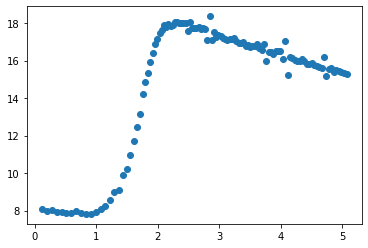

In [160]:
plt.scatter(t,w)
plt.show()

In [ ]:
1, 5, 6, 8

C:\Users\stepa\AppData\Local\Temp/ipykernel_1452/1200692484.py:21: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()


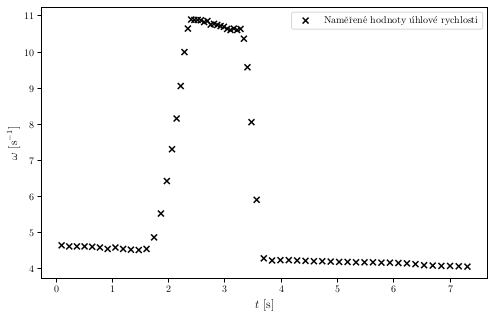

In [190]:
i = 1
t,w = load('velocity_{}.txt'.format(i))



plt.figure(figsize = (8,5))

plt.scatter(t, w, marker = 'x', color='black', label='Naměřené hodnoty úhlové rychlosti')


plt.legend(loc='upper right', fontsize=10)
#plt.legend(fontsize=8)

#popisky os
plt.ylabel("$\omega$ [s$^{-1}$]", fontsize=12)
plt.xlabel("$t$ [s]", fontsize=12)



plt.savefig('ukazka.pdf', bbox_inches = 'tight')
plt.show()

# UKOL 3

In [203]:
mp = 46.6/1000
g = 9.81
d = (6.3+2.2+13.9)/100

In [225]:
d

0.22399999999999998

In [214]:
velocity1 = np.array([-0.2,-0.309,-0.231,-0.207,-0.240,-0.183,-0.251,-0.208,-0.185,-0.222])
velocity2 = np.array([-29.739,-21.821,-26.181,-26.744,-35.536,-34.450,-31.729,-26.972,-36.733,-24.504])

In [215]:
omega = 5.8/3*velocity2

In [216]:
Omega = -mp*g*d/(I1/1000*omega)
sOmega = Omega*np.sqrt(0.001**2/d**2 + 0.0002**2/mp**2 + sI1**2/I1**2 + 0.1**2/omega**2)
print(Omega)
print(sOmega)

[0.19122839 0.2606178  0.21721634 0.21264362 0.16003323 0.16507811
 0.1792348  0.2108461  0.15481831 0.23208215]
[0.01275464 0.01738787 0.01448943 0.01418414 0.01067288 0.0110095
 0.01195419 0.01406414 0.01032493 0.01548201]


In [219]:
T = np.array([-omega, -velocity1, Omega, sOmega]).T.round(2)

print(tabulate(T, tablefmt="latex_booktabs"))

\begin{tabular}{rrrr}
\toprule
 57.5  & 0.2  & 0.19 & 0.01 \\
 42.19 & 0.31 & 0.26 & 0.02 \\
 50.62 & 0.23 & 0.22 & 0.01 \\
 51.71 & 0.21 & 0.21 & 0.01 \\
 68.7  & 0.24 & 0.16 & 0.01 \\
 66.6  & 0.18 & 0.17 & 0.01 \\
 61.34 & 0.25 & 0.18 & 0.01 \\
 52.15 & 0.21 & 0.21 & 0.01 \\
 71.02 & 0.18 & 0.15 & 0.01 \\
 47.37 & 0.22 & 0.23 & 0.02 \\
\bottomrule
\end{tabular}


In [230]:
(np.abs(velocity1) - Omega)/sOmega



array([ 0.68771944,  2.78252548,  0.951291  , -0.39788233,  7.49251747,
        1.62785619,  6.00334996, -0.20236561,  2.92318481, -0.65121697])

In [220]:
T = np.array([a1,a2,a3,a4,a5,a6]).T.round(2)

print(tabulate(T, tablefmt="latex_booktabs"))

\begin{tabular}{rrrrrr}
\toprule
 3.11 & 2.03 & 2.4  & 0.52 & 0.78 & 1.84 \\
 3.14 & 2.03 & 2.42 & 0.52 & 0.77 & 1.85 \\
 3.12 & 1.97 & 2.37 & 0.51 & 0.76 & 1.83 \\
 3.09 & 2.03 & 2.43 & 0.52 & 0.77 & 1.82 \\
 3.15 & 2.05 & 2.38 & 0.51 & 0.78 & 1.82 \\
 3.13 & 2.03 & 2.39 & 0.52 & 0.78 & 1.84 \\
 3.16 & 2    & 2.37 & 0.51 & 0.79 & 1.84 \\
 3.15 & 2.05 & 2.42 & 0.52 & 0.78 & 1.85 \\
 3.15 & 2.03 & 2.38 & 0.52 & 0.78 & 1.83 \\
 3.15 & 2.05 & 2.41 & 0.52 & 0.77 & 1.85 \\
\bottomrule
\end{tabular}


In [ ]:
[-0.36970821 -0.50386108 -0.41995159 -0.411111   -0.30939758 -0.31915102
 -0.34652061 -0.40763579 -0.2993154  -0.44869215]